<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Ajuste_de_curvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico:**

**Ajuste de curvas: caso não linear**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

Vamos usar o argumento de minimização para resolver problemas de [ajuste de curvas](https://pt.wikipedia.org/wiki/Ajuste_de_curvas), ou [de superfícies](https://www.cs.jhu.edu/~misha/Fall05/10.23.05.pdf), da forma
$$y_i\approx f(x_i),$$ em que $x=(x_1,\,x_2,\,\ldots,\,x_n)$ e $y=(y_1,\,y_2,\,\ldots,\,y_n)$ são dados advindos de algum problema.

**O caso mais simples: Resolvendo um sistema linear:**

Veja o [link do caso linear ...](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Ajuste_de_curvas_linear.ipynb)



**O caso não linear será tratado por meio de alguns exemplos**

#**Exemplo 1:**

Considere o seguinte problema:

dado o vetor $x=(0, 2, 4, 6, 8,10,+\infty)$ e $y=(84.8, 75.0, 67.2, 61.9, 57.6, 53.4, 20.0)$. Supondo que $$y\approx f(s)=\frac{1}{a+bs}+c.$$

Determine $a$, $b$ e $c$.



Vamos supor que $y\approx f(x)$ pode ser entendido como
a soma dos quadrados de $y_i-f(x_i)$ ser a menor possível.

Ou seja,
queremos minimizar $$g(u)=\sum_i\left(y_i-\frac{1}{a+bx_i}-c\right)^2,\qquad u=(a,b,c).$$

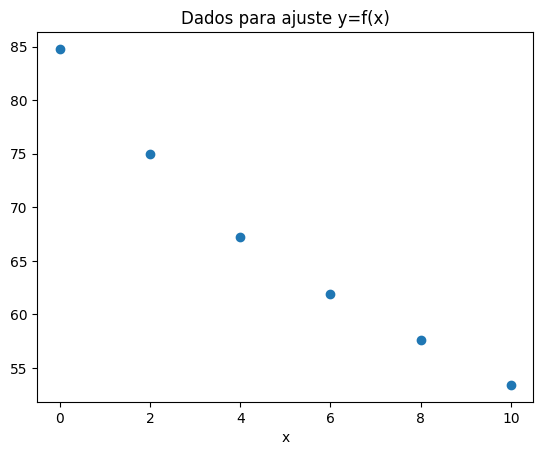

In [14]:
import numpy as np, matplotlib.pyplot as plt, copy as cp
x=[0,2,4,6,8,10]
y=[84.8,75.0,67.2,61.9,57.6,53.4]

plt.plot(x,y,'o')
plt.xlabel('x')
plt.title('Dados para ajuste y=f(x)')
plt.show()

**Usando linearização: Uma possível solução:**

Observe que quando $s$ for muito grande devemos ter $f(s)\approx c$, então podemos tomar $c=20$.

Antes, vamos tentar uma forma mais simples, supondo que $$z_i=\frac{1}{y_i-20}\approx a+bx_i$$ e que $$gl(u)=\sum_i\left(z_i-(a+bx_i)\right)^2,\qquad u=(a,b),$$ seja mínima.

z=[0.0154320987654321, 0.01818181818181818, 0.0211864406779661, 0.02386634844868735, 0.026595744680851064, 0.029940119760479042]


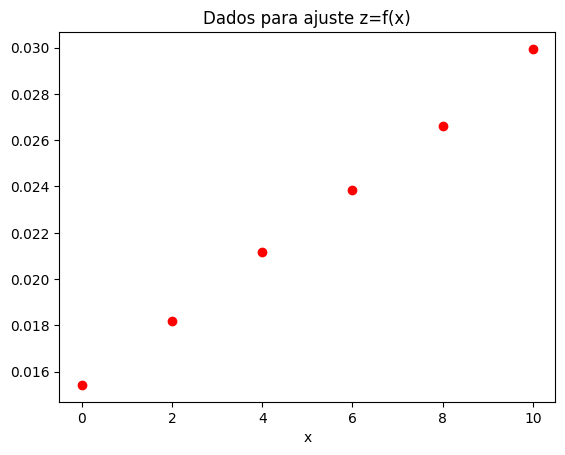

In [15]:
z=[]
for i in range(0,len(x)):
  z.append(1/(y[i]-20))

print(f'z={z}')
plt.plot(x,z,'o',color='red')
plt.xlabel('x')
plt.title('Dados para ajuste z=f(x)')
plt.show()

Observamos que $$gl(u)=\frac{1}{2}\|F(u)\|^2=\frac{1}{2}F(u)^TF(u),$$ em que $u=(a,b)$ e $$F(u)=Au-z,$$ sendo $$A=\begin{bmatrix}1&x_1\\1&x_2\\
\vdots&\vdots\\1&x_6\end{bmatrix}.$$

Então $$\nabla g(u)=A^T(Au-z)=0,$$ é um sistema linear $2\times 2$. Vamos resolver o problema de minimização por substituição direta.

In [16]:
A=np.transpose(np.array([[1,1,1,1,1,1],x]))
print('A=')
print(A)
print()

def F(u):
  return np.dot(A,u)-v    #Au-v

def g(u):
  return np.dot(F(u),F(u))/2 # produto escalar de F(u) com F(u)

N=np.transpose(A)@A
v=np.transpose(A)@z
N,v

A=
[[ 1  0]
 [ 1  2]
 [ 1  4]
 [ 1  6]
 [ 1  8]
 [ 1 10]]



(array([[  6,  30],
        [ 30, 220]]),
 array([0.13520257, 0.77647464]))

Obtemos então o vetor $u$:

In [17]:
u=np.linalg.solve(N,v)
u

array([0.01535792, 0.00143517])

Teste de ajuste:

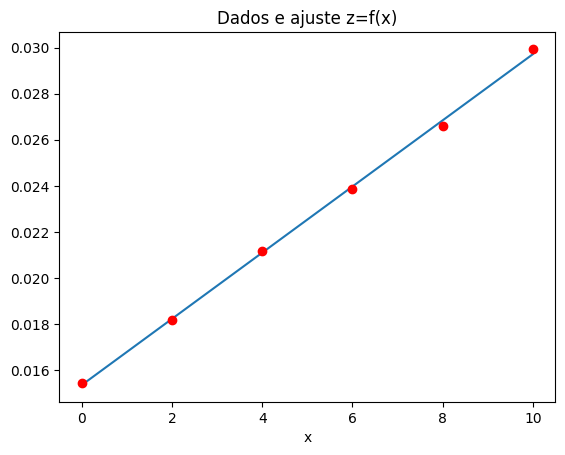

In [18]:
def fl(s):
  return u[0]+u[1]*s

t=np.linspace(0,10,1000)

plt.plot(t,fl(t))
plt.plot(x,z,'o',color='red')
plt.xlabel('x')
plt.title('Dados e ajuste z=f(x)')
plt.show()

Agora retornamos para o problema com $y\approx f(x)$, como segue:

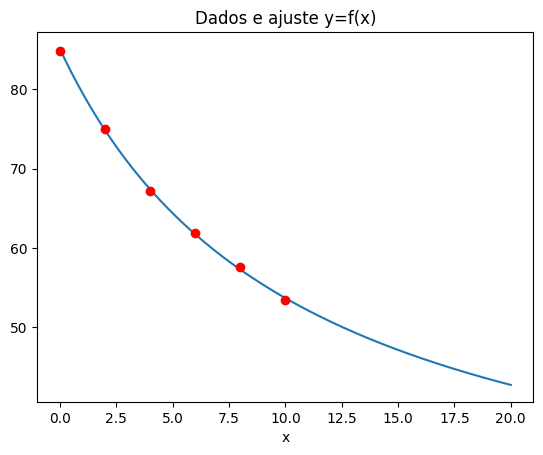

In [20]:
def f(s):
  return 1/(ue[0]+ue[1]*s)+20

t=np.linspace(0,20,1000)
plt.plot(t,f(t))
plt.plot(x,y,'o',color='red')
plt.xlabel('x')
plt.title('Dados e ajuste y=f(x)')
plt.show()

<font color=red> Note que o ajuste obtido não é exatamente o que minimiza $g(u)$, mas é visualmente bom.

Tente obter o ajuste que minimiza $g(u)$.

#**Exemplo 2:**

<font color=blue> Para mostrar que o método de linearização nem sempre funciona!

Dados os valores de $x$ e de $y\approx f(x)$.


x=[ 2  5  8 11 14 17 27 31 41 44]
y=[94.8 89.7 81.3 74.9 68.7 64.  49.3 44.  39.1 31.6]


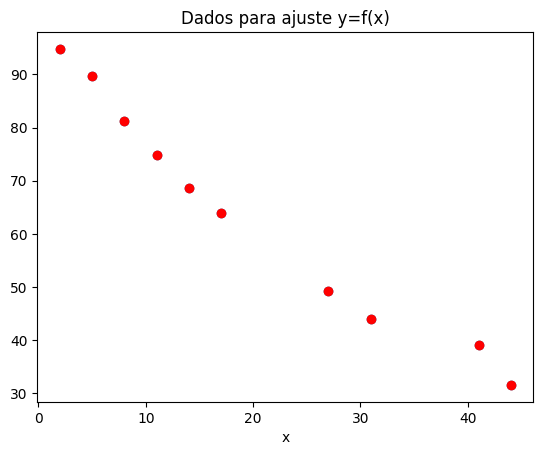

In [40]:
x=np.array([2, 5, 8, 11, 14, 17, 27, 31, 41, 44])
y=np.array([94.8, 89.7, 81.3, 74.9, 68.7, 64.0, 49.3, 44.0, 39.1, 31.6])
print(f'x={x}')
print(f'y={y}')

plt.plot(x,y,'o')
plt.plot(x,y,'o',color='red')
plt.xlabel('x')
plt.title('Dados para ajuste y=f(x)')
plt.show()

Suponha que $$y\approx f(x)=\frac{x}{ax^2+bx+c}$$ e determine o vetor $u=(a,b,c)$.



**Tentando usar linearização**

Nesse caso teremos
$$z=\frac{x}{y}\approx f_1(x)=ax^2+bx+c,$$

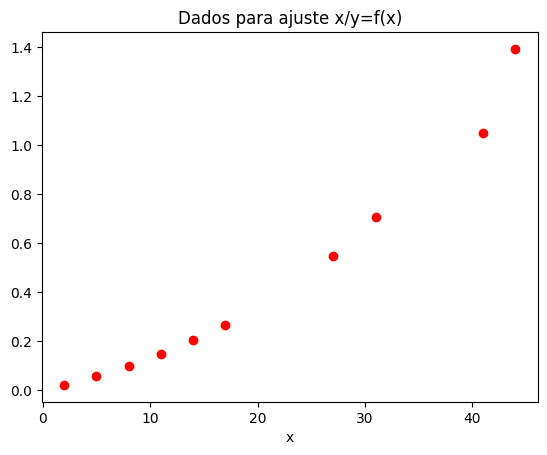

In [41]:
z=[]
for i in range(0,len(x)):
  z.append(x[i]/y[i])

plt.plot(x,z,'o',color='red')
plt.xlabel('x')
plt.title('Dados para ajuste x/y=f(x)')
plt.show()

Como feito antes, basta agora resolver um sistema linear da forma $$A^T(Au-z)=0.$$

In [42]:
A=np.transpose(np.array([x**2,x,x**0]))
print('A=')
print(A)
print()

v=cp.deepcopy(z)
print('z=')
print(z)

def F(u):
  return np.dot(A,u)-v    #Au-v

def g(u):
  return np.dot(F(u),F(u))/2 # produto escalar de F(u) com F(u)

N=np.transpose(A)@A
print('N=',N)

v=np.transpose(A)@z
print('v=',v)

A=
[[   4    2    1]
 [  25    5    1]
 [  64    8    1]
 [ 121   11    1]
 [ 196   14    1]
 [ 289   17    1]
 [ 729   27    1]
 [ 961   31    1]
 [1681   41    1]
 [1936   44    1]]

z=
[0.02109704641350211, 0.055741360089186176, 0.0984009840098401, 0.14686248331108143, 0.20378457059679767, 0.265625, 0.5476673427991887, 0.7045454545454546, 1.0485933503836318, 1.3924050632911391]
N= [[8170134  213212    6006]
 [ 213212    6006     200]
 [   6006     200      10]]
v= [5.67695265e+03 1.50978283e+02 4.48472266e+00]


Temos então o vetor solução do sistema

In [43]:
u=np.linalg.solve(N,v)
u

array([0.00057424, 0.00390162, 0.02555113])

Definindo a função e testando o ajuste:

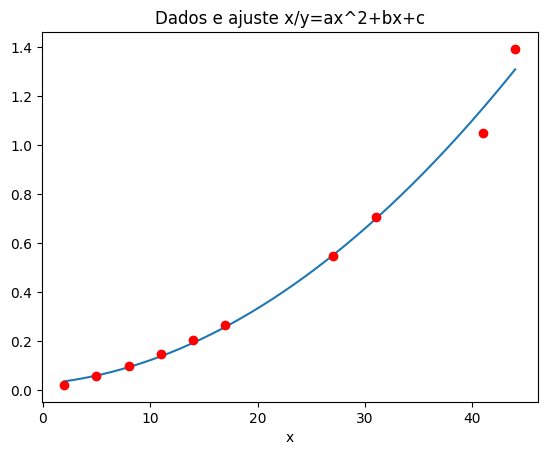

In [44]:
def fl(s):
  return u[2]+u[1]*s+u[0]*s**2

t=np.linspace(2,44,1000)

plt.plot(t,fl(t))
plt.plot(x,z,'o',color='red')
plt.xlabel('x')
plt.title('Dados e ajuste x/y=ax^2+bx+c')
plt.show()

O ajuste linearizado parace bom, mas vamos testar o ajuste com os dados na forma inicial $y=f(x)$:

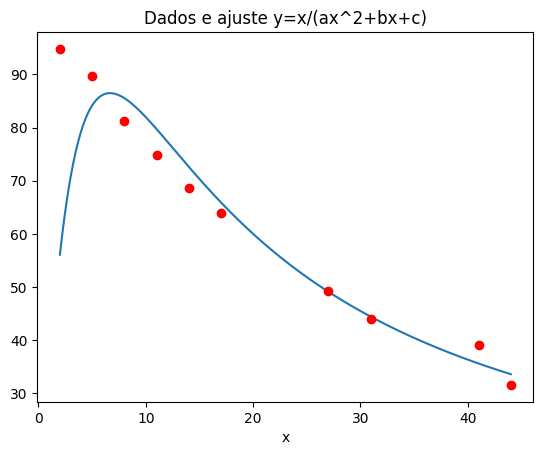

In [45]:
def fnl(s):
  return s/fl(s)

t=np.linspace(2,44,1000)

plt.plot(t,fnl(t))
plt.plot(x,y,'o',color='red')
plt.xlabel('x')
plt.title('Dados e ajuste y=x/(ax^2+bx+c)')
plt.show()

<font color=red> Isso sugere que o último ajuste usando a linearização não foi bom.

**Uma tentativa sem linearização**

Vamos tentar obter ajuste melhor para os dados como $$y\approx f(x)=\frac{x}{ax^2+bx+c},$$ sem linearizar.

Precisamos então da função
$$F(u)=\begin{bmatrix}f(u,x_1)-y_1\\f(u,x_2)-y_2\\\vdots\\f(u,x_{10})-y_{10}\end{bmatrix},\qquad u=(a,b,c),$$ com $$f(u,x)=\frac{x}{ax^2+bx+c}.$$

Definimos $$g(u)=\frac{1}{2}\|F(u)\|^2=\frac{1}{2}F(u)^TF(u),$$  e depois resolvemos numericamente a equação diferencial  
 $$\begin{cases} u'&=&-\nabla g(u)\\\\u(0)&=&u_0\end{cases},\tag{2}$$ para determinar ponto de mínimo aproximado de $g(u)$, ou seja, $$u(t_1)\approx \min_ug(u),\tag{3}$$ lembrando que $$\nabla g(u)=\left[JF(u)\right]^TF(u).$$


 Definimos no que segue $F(u)$ e $g(u)$.

 Definimos também $JF(u)$ e $\nabla g(u)$ de forma aproximada.

In [46]:
def f(u,s):
  return s/(u[0]*s**2+u[1]*s+u[2])

def F(u):
  p=[]
  for i in range(0,len(x)):
    p.append(f(u,x[i])-y[i])
  return np.array(p)

def JF(u):
    h=10**(-8)
    p=[]
    u=np.array(u)
    u.astype(float)                              # Tem que tomar cuidado com divisão inteira
    for j in range(0,len(u)):
      uh=0*u
      uh[j]=h
      p.append((F(u+uh)-F(u))/h)
    return np.transpose(p)

def g(u):
  return np.dot(F(u),F(u))/2 # produto escalar de F(u) com F(u)

def Gradg(u):
  p=np.dot(np.transpose(JF(u)),F(u))
  return np.array(p)

def Hg(u):
  h=10**(-8)
  p=[]
  u=np.array(u)
  u.astype(float)                              # Tem que tomar cuidado com divisão inteira
  for j in range(0,len(u)):
    uh=0*u
    uh[j]=h
    p.append((Gradg(u+uh)-Gradg(u))/h)
  return np.transpose(p)

Utilizando método de Euler para estimar $u$, usando a aproximação do modo linearizado como condição inicial:

In [47]:
def Eulerac(u0,n):                                # Nesse caso definimos o número de iterações
  u=[]
  u.append(u0)                                    # Condição inicial
  fu=[]
  fu.append(g(u[0]))

  for i in range(1,n+1):
      v=Gradg(u[i-1])
      ht=np.dot(np.dot(Hg(u[i-1]),v),v)
      if (ht>0):                                  # evitando divisão por 0
        hi=(np.dot(v,v))/ht
        u.append(u[i-1]-hi*v)                     # u_(i+1)=u_i+hf(t_0+ih,u_i) método de Euler
        fu.append(g(u[i]))
      else:                                       # não há como fazer mais iterações.
        n=i-1
        print(f'Número máximo de iterações n={n}')
        break

  print(f'Solucao aproximada u={u[n]}')
  print(f'Gradiente no ponto aproximado Gradg(u)={Gradg(u[n])}')
  print(f'Valor aproximado de F(u)={F(u[n])}')
  print(f'Valor aproximado de g(u)={g(u[n])}')

    # Criando a figura e projeção em 3D
  Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
  lines_plotted = plt.plot([])

  line_plotted = lines_plotted[0]


  plt.plot(np.linspace(0,n,n+1),fu,color='red',label='g(u(t))=g(x(t),y(t)) por Euler')
  plt.ylabel('g(u(t))')
  plt.xlabel('n')
  plt.legend()
  plt.title('Aproximação de solução por aceleração do método de Euler')
  plt.show()

  return u[n]

Solucao aproximada u=[0.00045434 0.00815597 0.00303761]
Gradiente no ponto aproximado Gradg(u)=[-0.00269962 -0.00121057  0.00263388]
Valor aproximado de F(u)=[-0.31284965  0.91928318  0.86676691 -0.43888319 -0.82823098 -1.72725516
 -0.60404289  0.76592545 -1.86699958  3.84106598]
Valor aproximado de g(u)=12.373610816529512


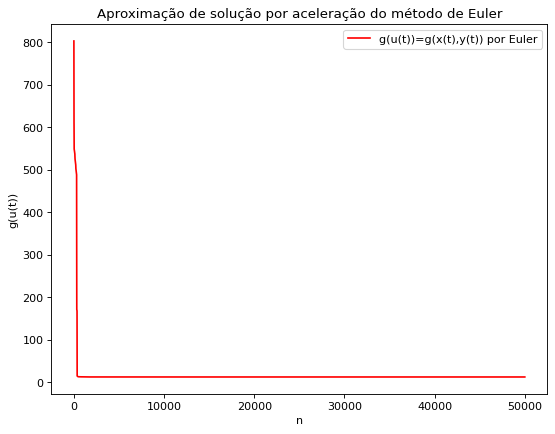

In [48]:
ue=Eulerac(u,50000)

Com a nova aproximação obtida definimos a função $f(x)$, e checamos graficamente que o ajuste agora é melhor, para os dados originais.


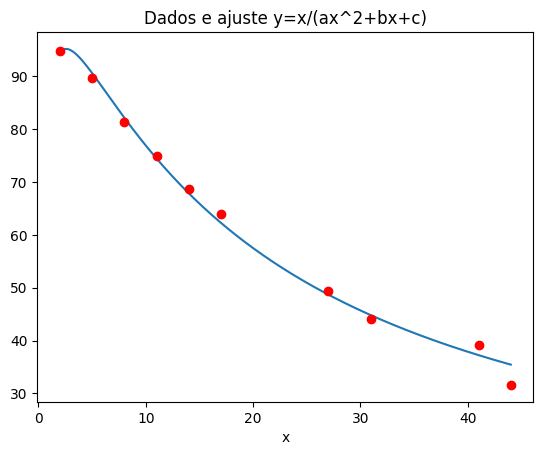

In [49]:
def fnl2(s):
  return s/(ue[2]+ue[1]*s+ue[0]*s**2)

t=np.linspace(2,44,1000)

plt.plot(t,fnl2(t))
plt.plot(x,y,'o',color='red')
plt.xlabel('x')
plt.title('Dados e ajuste y=x/(ax^2+bx+c)')
plt.show()

Observe que ajuste melhor existe, porque no caso, ainda temos $\nabla G(u)\neq 0$ e podemos fazer mais iterações, ou tentar caclular as derivadas envolvidas de forma exata.